# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [2]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [38]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.69, 即時現金賣出: 30.36


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [1]:
import pandas as pd
url='https://rate.bot.com.tw/xrt?Lang=zh-TW'
df=pd.read_html(url)[0]
dfs=df.ix[:,0:5]
dfs

/Users/louis/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/louis/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:993: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  obj = getattr(obj, self.name)._getitem_axis(key, axis=axis)


幣別                        現金匯率          \
                        幣別 Unnamed: 1_level_1     本行買入    本行賣出   
0       美金 (USD)  美金 (USD)             29.655   30.325  30.005   
1       港幣 (HKD)  港幣 (HKD)              3.709    3.913   3.835   
2       英鎊 (GBP)  英鎊 (GBP)              38.26    40.38   39.26   
3       澳幣 (AUD)  澳幣 (AUD)              20.26    21.04   20.53   
4   加拿大幣 (CAD)  加拿大幣 (CAD)              22.65    23.56   23.04   
5   新加坡幣 (SGD)  新加坡幣 (SGD)              21.68    22.59   22.17   
6   瑞士法郎 (CHF)  瑞士法郎 (CHF)              30.18    31.38   30.84   
7       日圓 (JPY)  日圓 (JPY)             0.2682    0.281  0.2755   
8     南非幣 (ZAR)  南非幣 (ZAR)                  -        -   2.056   
9     瑞典幣 (SEK)  瑞典幣 (SEK)               2.79     3.31    3.13   
10      紐元 (NZD)  紐元 (NZD)              19.49    20.34   19.87   
11      泰幣 (THB)  泰幣 (THB)             0.8691   1.0571  0.9777   
12  菲國比索 (PHP)  菲國比索 (PHP)             0.5172   0.6502       -   
13    印尼幣 (IDR)  印尼幣 (IDR)            0.00183  0.00253       -   
14      歐元 (EUR)  歐元 (EUR)              32.71    34.05   33.33   
15      韓元 (KRW)  韓元 (KRW)             0.0239   0.0278       -   
16    越南盾 (VND)  越南盾 (VND)            0.00092  0.00142       -   
17    馬來幣 (MYR)  馬來幣 (MYR)               6.21    7.854       -   
18    人民幣 (CNY)  人民幣 (CNY)               4.23    4.392   4.302   

   Unnamed: 4_level_0  
                 本行買入  
0              30.105  
1               3.895  
2               39.68  
3               20.76  
4               23.26  
5               22.35  
6               31.13  
7              0.2795  
8               2.136  
9                3.23  
10              20.07  
11             1.0177  
12                  -  
13                  -  
14              33.73  
15                  -  
16                  -  
17                  -  
18              4.352

)## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖

In [ ]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2019-08")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖


                                美金 (USD)
                            


<Figure size 720x576 with 0 Axes>

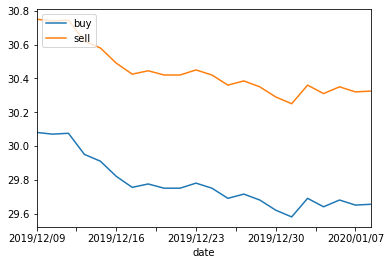


                                港幣 (HKD)
                            


<Figure size 720x576 with 0 Axes>

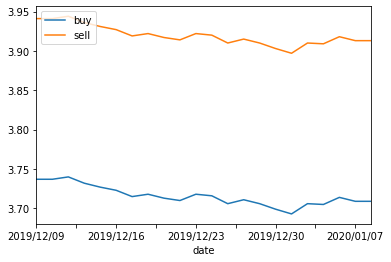


                                英鎊 (GBP)
                            


<Figure size 720x576 with 0 Axes>

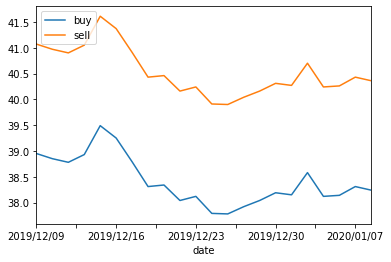


                                澳幣 (AUD)
                            


<Figure size 720x576 with 0 Axes>

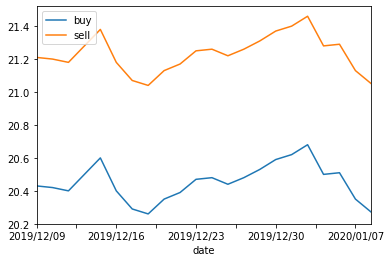


                                加拿大幣 (CAD)
                            


<Figure size 720x576 with 0 Axes>

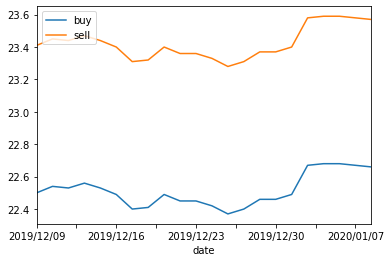


                                新加坡幣 (SGD)
                            


<Figure size 720x576 with 0 Axes>

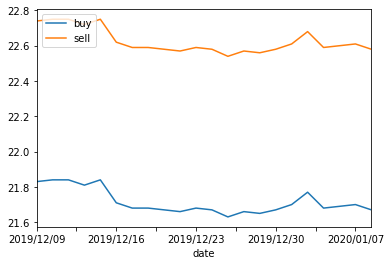


                                瑞士法郎 (CHF)
                            


<Figure size 720x576 with 0 Axes>

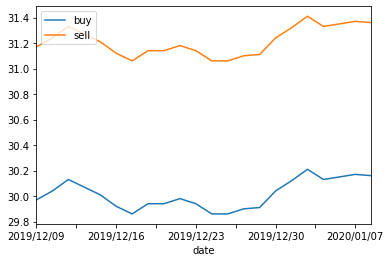


                                日圓 (JPY)
                            


<Figure size 720x576 with 0 Axes>

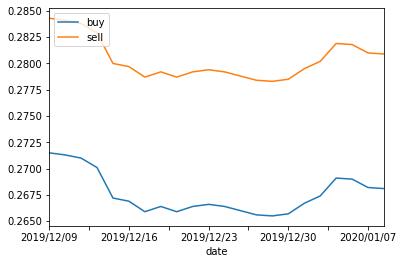


                                南非幣 (ZAR)
                            


<Figure size 720x576 with 0 Axes>

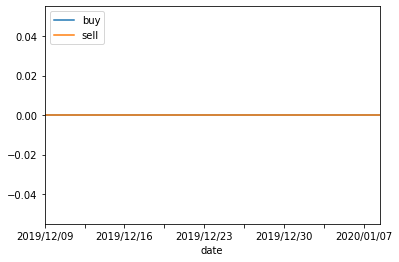


                                瑞典幣 (SEK)
                            


<Figure size 720x576 with 0 Axes>

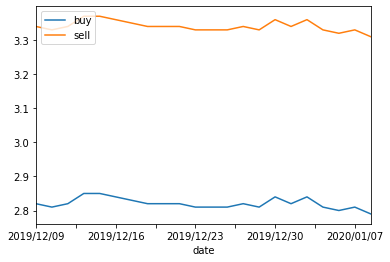


                                紐元 (NZD)
                            


<Figure size 720x576 with 0 Axes>

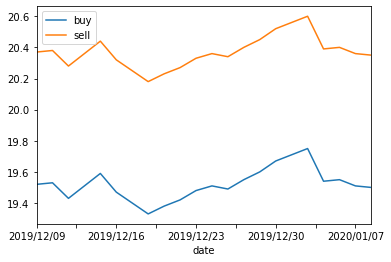


                                泰幣 (THB)
                            


<Figure size 720x576 with 0 Axes>

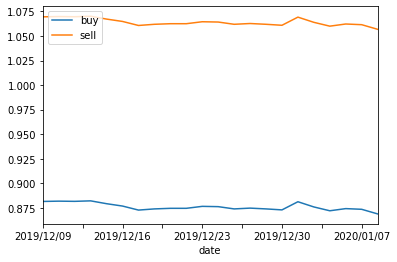


                                菲國比索 (PHP)
                            


<Figure size 720x576 with 0 Axes>

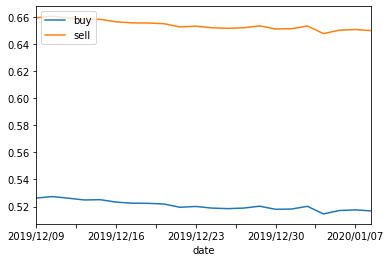


                                印尼幣 (IDR)
                            


<Figure size 720x576 with 0 Axes>

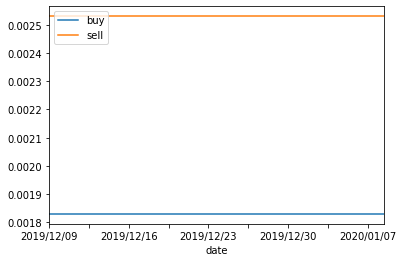


                                歐元 (EUR)
                            


<Figure size 720x576 with 0 Axes>

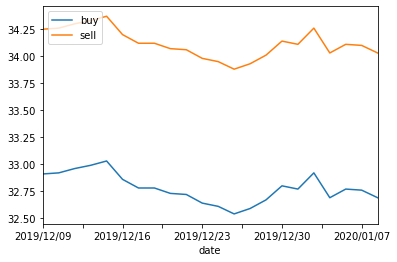


                                韓元 (KRW)
                            


<Figure size 720x576 with 0 Axes>

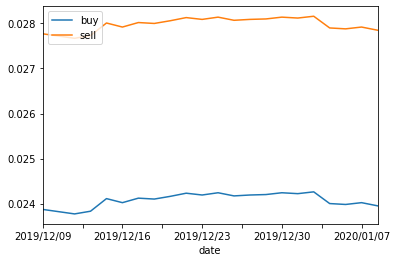


                                越南盾 (VND)
                            


<Figure size 720x576 with 0 Axes>

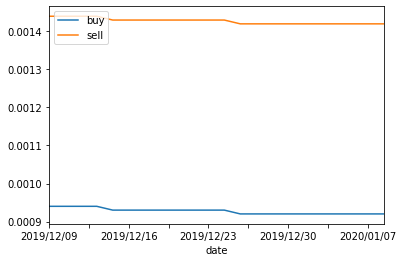


                                馬來幣 (MYR)
                            


<Figure size 720x576 with 0 Axes>

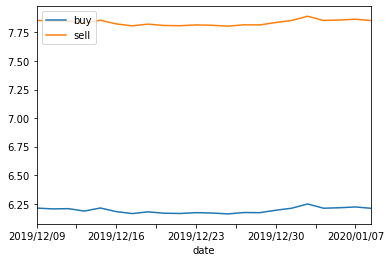

In [63]:
url='https://rate.bot.com.tw/xrt?Lang=zh-TW'
r=requests.get(url)
r.encoding='utf-8'
res=BeautifulSoup(r.text,'html5lib')
#res.text
table=res.find(name='table',attrs={"title":"牌告匯率"}).find(name='tbody').find_all('tr')
for i in range(0,18):
    print(table[i].find(name='div',attrs={"class":"visible-phone print_hide"}).text)
    
    tables=table[i].find_all(name='td',attrs={'class':"text-center print_hide phone-small-font"})[1]
    history_http="https://rate.bot.com.tw"+tables.a['href']
    his_link=history_http.replace('history','quote/ltm')

   
    
    r=requests.get(his_link)
    r.encoding='utf-8'
    res=BeautifulSoup(r.text,'html5lib')

    history_price=res.find(name='table',attrs={"class":"table table-striped table-bordered table-condensed table-hover"}).find(name='tbody').find_all('tr')

    
#畫圖
    date_history=list()
    history_buy = list()
    history_sell = list()
#時間
    for history_rate in history_price:
        date_string=history_rate.a.get_text()
        date=datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')
        date_history.append(date)

        history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
        history_buy.append(float(history_ex_rate[0].get_text()))  
        history_sell.append(float(history_ex_rate[1].get_text()))  

    hispd=pd.DataFrame({'date':date_history,
                       'buy':history_buy,
                       'sell':history_sell})

    hispd=hispd.loc[:21]
    hispd=hispd.set_index('date')
    hispd=hispd.sort_index(ascending=True)

    plt.figure(figsize=(10, 8))
    hispd[['buy','sell']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.show()
